# SpaceRocks

### Vectorized coordinate transformation and ephemeris calculation with robust unit handling.

To install, simply `pip install spacerocks`

In [ ]:
from spacerocks import Units, SpaceRock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u
%matplotlib inline

from astroquery.jplhorizons import Horizons

In [ ]:
units = Units()
units.current()

In [1]:
from spacerocks import Units, SpaceRock
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
units = Units()
rock = SpaceRock(a=4.487673062316562E+02,
                 e=9.214543710796702E-01,
                 inc=5.411068217470999E+01,
                 arg=3.480587931444684E+02,
                 node=1.352131434907198E+02,
                 M=3.585441302379153E+02,
                 epoch=2458982.500000000,
                 H=4.4,
                 rotation_period=0.3,
                 delta_H=0.3,
                 phi0=np.pi/2,
                 name='2015 BP519',
                 frame='barycentric',
                 units=units)

prop = rock.propagate(epochs=np.linspace(2458982.5, 2458982.5 + 10, 1000), model=2)

Text(0.5, 0, 'JD')

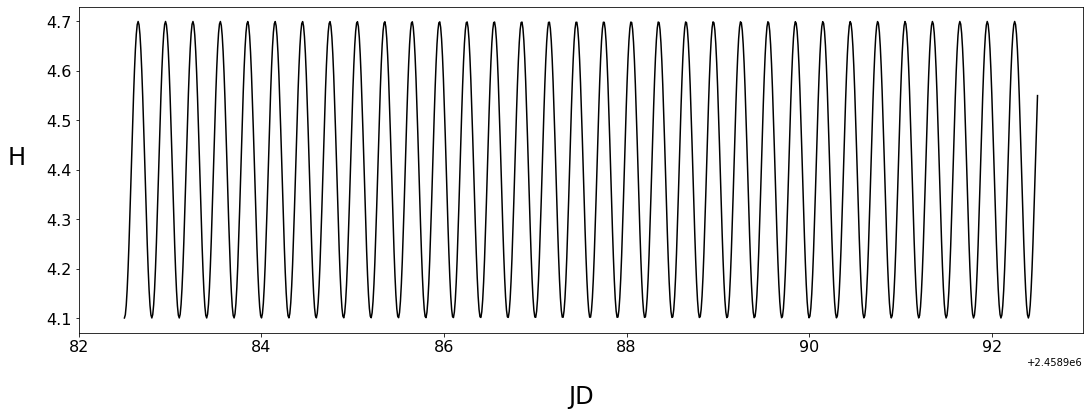

In [7]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(prop.epoch.jd, prop.H, color='black')
ax.tick_params(labelsize=16)
ax.set_ylabel('H', fontsize=24, labelpad=30, rotation=0)
ax.set_xlabel('JD', fontsize=24, labelpad=30, rotation=0)

In [ ]:
Nyears = 100
startdate = Time('2021-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + Nyears*365.25, 10), scale='utc', format='jd' )
tno_id = 'Sedna'
TNO_Horizons = Horizons(id=tno_id, location='@ssb')
elements = TNO_Horizons.elements()[0]
ephem_Horizons = Horizons(id=tno_id, location='500',
                          epochs={'start':testdates[0].iso, 'stop':testdates[-1].iso, 'step':'10d'}).ephemerides()

In [ ]:
units = Units()
TNO = SpaceRock(a=elements['a'],
                e=elements['e'],
                inc=elements['incl'],
                arg=elements['w'],
                node=elements['Omega'],
                M=elements['M'],
                epoch=elements['datetime_jd'],
                name=[tno_id],
                input_frame='barycentric',
                units=units)

TNO_prop = TNO.propagate(obsdates=testdates.jd, model=6, gr=True)

In [ ]:
epochs = {'start':testdates[0].iso, 'stop':testdates[-1].iso, 'step':'10d'}
elem = Horizons(id=tno_id, epochs=epochs, location='@ssb').elements()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['nu'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.true_anomaly.deg, color='red', s=10)

ax[0].set_ylabel(r'$\nu$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['nu'] - TNO_prop.true_anomaly.deg, color='black', s=50)

ax[1].set_ylabel(r'$d\nu$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['a'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.a.au, color='red', s=10)

ax[0].set_ylabel(r'$a$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['a'] - TNO_prop.a.au, color='black', s=50)

ax[1].set_ylabel(r'$da$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['e'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.e, color='red', s=10)

ax[0].set_ylabel(r'$e$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['e'] - TNO_prop.e, color='black', s=50)

ax[1].set_ylabel(r'$de$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['incl'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.inc.deg, color='red', s=10)

ax[0].set_ylabel(r'$inc$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['incl'] - TNO_prop.inc.deg, color='black', s=50)

ax[1].set_ylabel(r'$dinc$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['w'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.arg.deg, color='red', s=10)

ax[0].set_ylabel(r'$\omega$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['w'] - TNO_prop.arg.deg, color='black', s=50)

ax[1].set_ylabel(r'$d\omega$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8), sharex=True)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, elem['Omega'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_prop.node.deg, color='red', s=10)

ax[0].set_ylabel(r'$\Omega$', fontsize=14)
ax[0].set_xlim([0, Nyears])

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, elem['Omega'] - TNO_prop.node.deg, color='black', s=50)

ax[1].set_ylabel(r'$d\Omega$', fontsize=14)
ax[1].set_xlabel('JD', fontsize=14)

In [ ]:
TNO_predict = TNO_prop.observe(obscode='W84')

In [ ]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(TNO_predict.ra.deg, TNO_predict.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['RA'], color='black', s=50)
ax.scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.ra.deg, color='red', s=10)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([0, Nyears]);

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['DEC'], color='black', s=50)
ax.scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.dec.deg, color='red', s=10)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('dec', fontsize=14)
ax.set_xlim([0, Nyears]);

---

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['RA_rate'], color='black', s=50)
ax.scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.ra_rate.to(u.arcsec/u.hour), color='red', s=10)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([0, Nyears]);

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['DEC_rate'], color='black', s=50)
ax.scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.dec_rate.to(u.arcsec/u.hour), color='red', s=10)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([0, Nyears]);

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.hist((ephem_Horizons['DEC_rate'] - TNO_predict.dec_rate.to(u.arcsec/u.hour)) / ephem_Horizons['DEC_rate'] , color='black', bins=100)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([-1, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, (ephem_Horizons['DEC_rate'] - TNO_predict.dec_rate.to(u.arcsec/u.hour)) / ephem_Horizons['DEC_rate'] , color='black', s=50)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([0, Nyears]);
ax.set_ylim([-1, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((testdates.jd - testdates.jd[0])/365.25, (ephem_Horizons['RA_rate'] - np.cos(TNO_predict.dec) *TNO_predict.ra_rate.to(u.arcsec/u.hour)) / ephem_Horizons['RA_rate'] , color='black', s=50)
ax.set_xlabel('JD', fontsize=14)
ax.set_ylabel('ra', fontsize=14)
ax.set_xlim([0, Nyears]);
ax.set_ylim([-1, 1])

### Analyzing all of the TNOs in the MPC

In [ ]:
TNOs = pd.read_json('https://minorplanetcenter.net/Extended_Files/distant_extended.json.gz')

TNOs = TNOs[TNOs.Principal_desig.values.astype(str) == '2015 BP519']
units = Units()
rocks = SpaceRock(a=TNOs.a.values, 
                  e=TNOs.e.values, 
                  inc=TNOs.i.values, 
                  arg=TNOs.Peri.values, 
                  node=TNOs.Node.values, 
                  t_peri=TNOs.Tp.values, 
                  epoch=TNOs.Epoch.values,
                  H=TNOs.H.values, 
                  name=TNOs.Principal_desig.values,
                  #delta_H = np.random.rand(len(TNOs)),
                  #rotation_period = np.random.uniform(0.2, 0.5, len(TNOs)),
                  #phi0 = np.random.rand(len(TNOs)) * 2 * np.pi,
                  input_frame='heliocentric',
                  units=units)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['RA_rate'], color='black', s=50)
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.ra_rate.to(u.arcsec/u.h), color='red', s=10)
ax[0].set_xlabel('JD', fontsize=14)
ax[0].set_ylabel('ra rate (arcsec/h)', fontsize=14)
ax[0].set_xlim([0, Nyears]);

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, ephem_Horizons['DEC_rate'], color='black', s=50)
ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, TNO_predict.dec_rate.to(u.arcsec/u.h), color='red', s=10)
ax[1].set_xlabel('JD', fontsize=14)
ax[1].set_ylabel('dec rate (arcsec/h)', fontsize=14)
ax[1].set_xlim([0, Nyears]);

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
ax[0].scatter((testdates.jd - testdates.jd[0])/365.25, 
              ephem_Horizons['RA_rate'] - TNO_predict.ra_rate.to(u.arcsec/u.h), color='black', s=1)
ax[0].set_xlabel('JD', fontsize=14)
ax[0].set_ylabel('ra rate (arcsec/h)', fontsize=14)
ax[0].set_xlim([0, Nyears]);

ax[1].scatter((testdates.jd - testdates.jd[0])/365.25, 
              ephem_Horizons['DEC_rate'] - TNO_predict.dec_rate.to(u.arcsec/u.h), color='black', s=1)
ax[1].set_xlabel('JD', fontsize=14)
ax[1].set_ylabel('dec rate (arcsec/h)', fontsize=14)
ax[1].set_xlim([0, Nyears]);

In [ ]:
from spacerocks import Propagate

In [ ]:
startdate = Time('2020-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + 2*365.25, 30), scale='utc', format='jd' )
tno_id = '2014 DM81'
TNO_Horizons = Horizons(id=tno_id, location='@ssb')
elements = TNO_Horizons.elements()[0]
ephem_Horizons = Horizons(id=tno_id, location='W84',
                          epochs={'start':testdates[0].iso, 'stop':testdates[-1].iso, 'step':'30d'}).ephemerides()

units = Units()
rock = SpaceRock(a=elements['a'],
                  e=elements['e'],
                  inc=elements['incl'],
                  arg=elements['w'],
                  node=elements['Omega'],
                  t_peri=elements['Tp_jd'],
                  epoch=elements['datetime_jd'],
                  name=[tno_id],
                  units=units,
                  input_frame='barycentric')

prop = rock.propagate(obsdates=testdates.jd, model=1)
obs = prop.observe(obscode='W84')
#p = Propagate(TNO, obsdates=testdates.jd, model=6, add_pluto=True, gr=True)
#TNO_predict = Observe(p, obscode='W84')
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(np.linspace(2020, 2022, len(testdates)), sep.arcsec, color='black', s=5)
ax.set_xlabel('Year', fontsize=24, labelpad=30)
ax.set_ylabel('Residual (arcsec)', fontsize=24, labelpad=30)
ax.grid()
ax.tick_params(labelsize=16)
ax.set_xlim([2020, 2022])
ax.set_xticks([2020, 2021, 2022])
#ax.set_ylim(bottom=0)
#ax.axhline(0.08, color='red', linewidth=4)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(np.linspace(1800, 2200, len(testdates)), ephem_Horizons['DEC']*3600 - TNO_predict.dec.deg*3600, color='black', s=5)
ax.set_xlabel('Year', fontsize=24, labelpad=30)
ax.set_ylabel('Residual (arcsec)', fontsize=24, labelpad=30)
ax.grid()
ax.tick_params(labelsize=16)
ax.set_xlim([1800, 2200])
#ax.set_ylim(bottom=0)
ax.axhline(0.08, color='red', linewidth=4)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter(np.linspace(1800, 2200, len(testdates)), ephem_Horizons['RA']*3600 - TNO_predict.ra.deg*3600, color='black', s=5)
ax.set_xlabel('Year', fontsize=24, labelpad=30)
ax.set_ylabel('Residual (arcsec)', fontsize=24, labelpad=30)
ax.grid()
ax.tick_params(labelsize=16)
ax.set_xlim([1800, 2200])
#ax.set_ylim(bottom=0)
ax.axhline(0.08, color='red', linewidth=4)

In [ ]:
units.current()

In [ ]:
units.angle = 'rad'
units.current()